In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("fruit_data_with_colors _1_.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [3]:
# Create a map from fruit lable value to fruit name to make results easier 
perdict = dict(zip(df['fruit_label'].unique(),df["fruit_name"].unique()))
perdict

{1: 'apple', 2: 'mandarin', 4: 'lemon', 3: 'orange'}

Dataset have seven columns containing the information about fruits. Here only two fruits i.e apple and mandarin are seen. Every fruit is described with four features i.e 1) mass of fruit 2) width of fruit 3) what is height and 4) what is color score of fruit. Now we have to check how many fruits are present in our data.

In [4]:
# check how many unique fruits name are present in the data set
df['fruit_name'].value_counts()

lemon       24
orange      19
apple       12
mandarin     5
Name: fruit_name, dtype: int64

We have seen that the dataset contains four unique fruits. apple with 12 entries, orange with 19 entries, lemon with 24 entries and mandarin with 5 entries.


Now we will store all unique data on four different dataframes.

In [5]:
apple_data = df[df['fruit_name']== 'apple']
orange_data = df[df['fruit_name']== 'orange']
lemon_data = df[df['fruit_name']== 'lemon']
mandarin_data = df[df['fruit_name']== 'mandarin']

In [6]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
8,1,apple,braeburn,178.0,7.1,7.8,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [7]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,mandarin,76.0,5.8,4.0,0.81


In [8]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
25,3,orange,spanish_jumbo,NaN,9.0,NaN,0.75
26,3,orange,spanish_jumbo,356.0,9.2,9.2,0.75
27,3,orange,spanish_jumbo,362.0,9.6,9.2,0.74
28,3,orange,selected_seconds,204.0,7.5,9.2,0.77
29,3,orange,selected_seconds,140.0,6.7,7.1,0.72


In [9]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
17,4,lemon,spanish_belsan,NaN,7.2,NaN,0.70
18,4,lemon,spanish_belsan,NaN,7.3,NaN,0.72
19,4,lemon,spanish_belsan,NaN,7.2,NaN,0.72
20,4,lemon,spanish_belsan,NaN,7.3,NaN,0.71
21,4,lemon,spanish_belsan,NaN,7.3,NaN,0.72


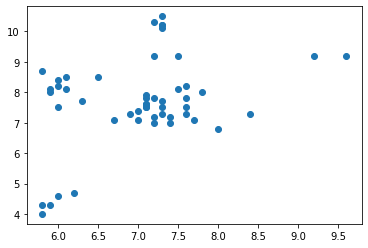

In [10]:
plt.scatter(df['width'], df['height'])

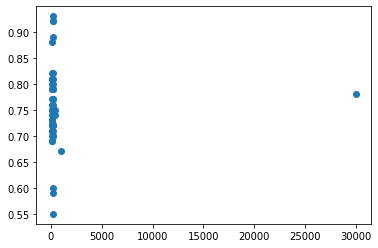

In [13]:
plt.scatter(df['mass'], df['color_score'])

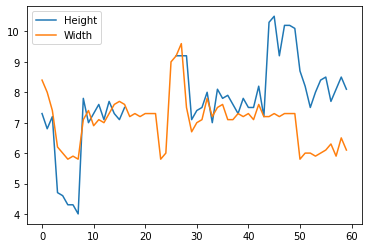

In [14]:
plt.plot(df['height'], label='Height')
plt.plot(df['width'], label='Width')
plt.legend()

Now we will use K-Nearest Neighbors classifier to predict a new record on the basis of this data. For this we will split this dataset into test and train sets. First we will import sklearn library for our model.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
X = df[['mass', 'width', 'height']]
y = df['fruit_label']

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
X_train.describe()

,mass,width,height
count,40.000000,48.000000,40.000000
mean,176.700000,7.027083,7.552500
std,142.339825,0.792180,1.498202
min,76.000000,5.800000,4.000000
25%,119.500000,6.275000,7.175000
50%,157.000000,7.200000,7.600000
75%,180.000000,7.325000,8.200000
max,1000.000000,9.200000,10.500000


In [20]:
X_test.describe()

,mass,width,height
count,11.000000,12.000000,11.000000
mean,2890.545455,7.133333,8.290909
std,8991.425786,1.001211,1.155383
min,118.000000,5.800000,7.000000
25%,148.000000,6.825000,7.500000
50%,164.000000,7.200000,7.800000
75%,195.000000,7.325000,8.950000
max,30000.000000,9.600000,10.300000


Now we will create a KNN classifier for making predictions.

In [22]:
knn = KNeighborsClassifier()
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
knn.fit(X_train , y_train)

KNeighborsClassifier()

We can check the accuracy of our classifier

In [24]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
knn.score(X_test,y_test)

0.75

Now we can make predictions with new data as following:

In [26]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['100','6.3','8']])
perdict[prediction1[0]]

/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


'lemon'

In [27]:
#example2
prediction2=knn.predict([['300','7','10']])
perdict[prediction2[0]]

/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


'orange'